<a href="https://colab.research.google.com/github/kinghim17/Walmart-/blob/main/Walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Walmart Sales Analysis

## Importing the libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## visualisation of dataset


In [31]:
filep = 'Walmart_Sales_CB1799BACC.xlsx'
df = pd.read_excel(filep)
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Date,Time,Payment,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,1/5/2019,13:08:00,Ewallet,9.1
1,226-31-3081,A,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3/8/2019,10:29:00,Cash,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,3/3/2019,13:23:00,Credit card,7.4
3,123-19-1176,B,Yangon,Member,Male,Health and beauty,58.22,8,1/27/2019,20:33:00,Ewallet,8.4
4,373-73-7910,C,Yangon,Normal,Male,Sports and travel,86.31,7,2/8/2019,10:37:00,Ewallet,5.3


## visualisation of customer type

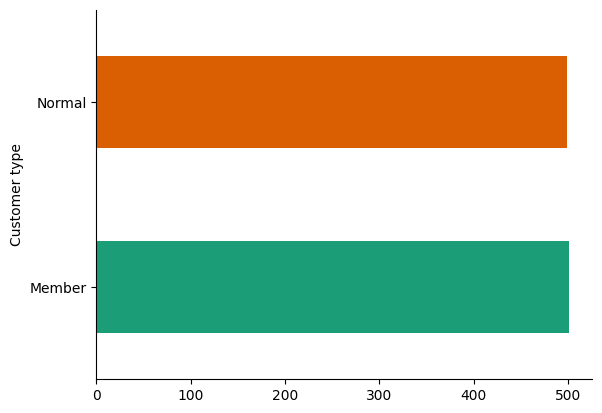

In [32]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Customer type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

##  Visulisation of Gender ratio

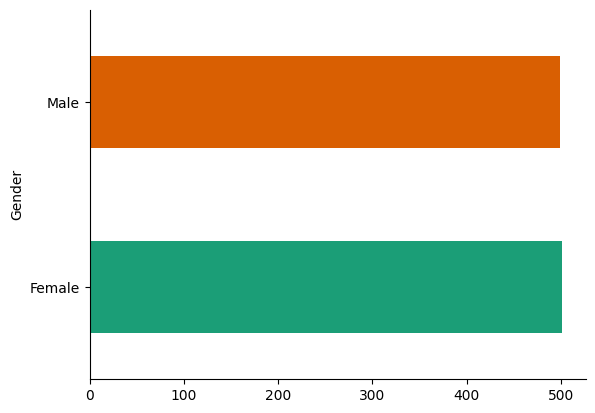

In [33]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## Visualisation of city by sales

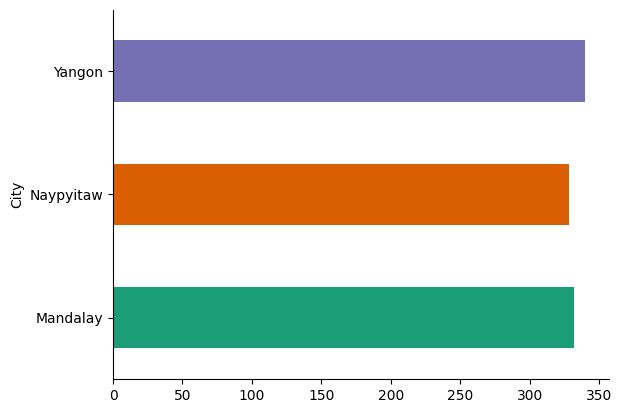

In [34]:
from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('City').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

## visualisation unit price

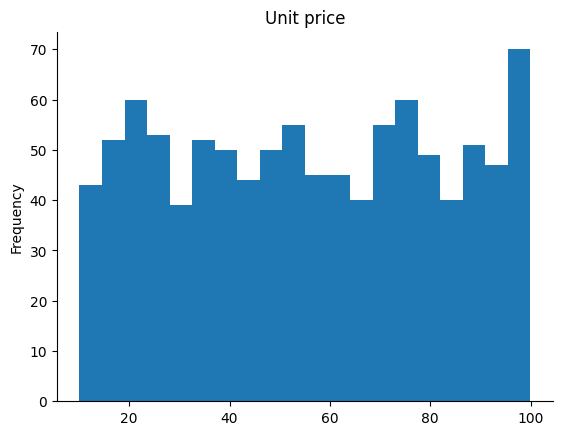

In [35]:
from matplotlib import pyplot as plt
df['Unit price'].plot(kind='hist', bins=20, title='Unit price')
plt.gca().spines[['top', 'right',]].set_visible(False)

## visualisation of quantity


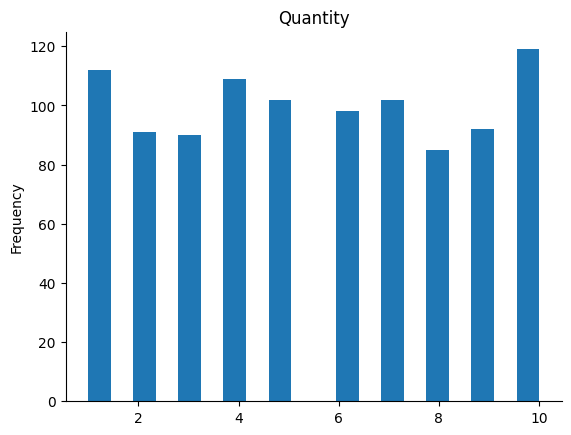

In [36]:
from matplotlib import pyplot as plt
df['Quantity'].plot(kind='hist', bins=20, title='Quantity')
plt.gca().spines[['top', 'right',]].set_visible(False)

# OPTION A

##  Group by city and branch, sum sales and revenue

In [37]:
city_branch_performance = df.groupby(['City', 'Branch'])[['Quantity', 'Unit price']].sum().reset_index()

print(city_branch_performance)

        City Branch  Quantity  Unit price
0   Mandalay      A       637     6349.11
1   Mandalay      B       664     6623.73
2   Mandalay      C       519     5506.04
3  Naypyitaw      A       648     5953.55
4  Naypyitaw      B       604     6298.64
5  Naypyitaw      C       579     6315.57
6     Yangon      A       598     6342.88
7     Yangon      B       631     6329.25
8     Yangon      C       630     5953.36


# Option B

## Group by branch and calculate the average price (option B)

In [38]:
avg_price_per_branch = df.groupby('Branch')['Unit price'].mean().reset_index()

print(avg_price_per_branch)

  Branch  Unit price
0      A   54.360175
1      B   56.622412
2      C   56.072461


# option C

## Ensure the Sale Date is in datetime format

In [39]:
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for 2019
df_2019 = df[df['Date'].dt.year == 2019]

# Group by product line, gender, payment, and month
sales_analysis = df_2019.groupby(['Product line', 'Gender', 'Payment', df_2019['Date'].dt.month])[['Quantity', 'Unit price']].sum().reset_index()

# Display the result
print(sales_analysis)

               Product line  Gender      Payment  Date  Quantity  Unit price
0    Electronic accessories  Female         Cash     1        52      534.48
1    Electronic accessories  Female         Cash     2       103      935.40
2    Electronic accessories  Female         Cash     3        51      622.23
3    Electronic accessories  Female  Credit card     1        54      371.20
4    Electronic accessories  Female  Credit card     2        39      444.19
..                      ...     ...          ...   ...       ...         ...
103       Sports and travel    Male  Credit card     2        27      410.63
104       Sports and travel    Male  Credit card     3        60      483.38
105       Sports and travel    Male      Ewallet     1        38      466.37
106       Sports and travel    Male      Ewallet     2        15      236.25
107       Sports and travel    Male      Ewallet     3        86      804.95

[108 rows x 6 columns]


## Display

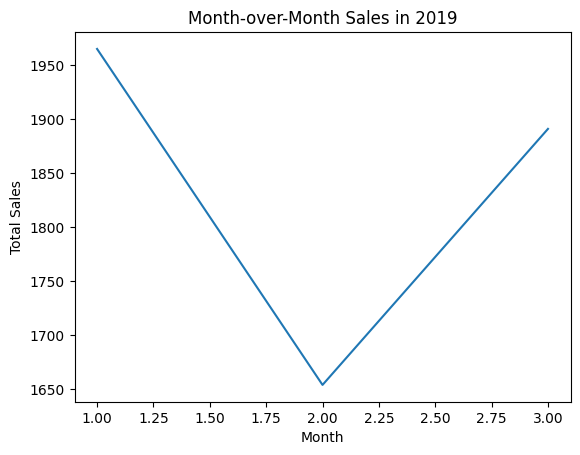

In [40]:
# Example: Plot total sales by month for each product line
sales_analysis.groupby('Date')['Quantity'].sum().plot(kind='line')
plt.title('Month-over-Month Sales in 2019')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# OPTION-C(continued)

## Total sales in january by product

In [63]:

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for january 2019
df_jan_2019 = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 1)]

# Group by product line, gender, payment, and month
sales_analysis = df_jan_2019.groupby(['Product line', 'Gender', 'Payment', df_jan_2019['Date'].dt.month])[['Quantity', 'Unit price']].sum().reset_index()

# for product line sums
product_line_sums_jan_2019 = df_jan_2019.groupby(['Product line','Gender'])[['Quantity', 'Unit price']].sum().reset_index()
product_line_sums_jan1_2019 = df_jan_2019.groupby('Product line')[['Quantity', 'Unit price']].sum().reset_index()
# Display the result
print(product_line_sums_jan_2019)
print(product_line_sums_jan1_2019)

              Product line  Gender  Quantity  Unit price
0   Electronic accessories  Female       149     1157.45
1   Electronic accessories    Male       184     1792.76
2      Fashion accessories  Female       197     2073.40
3      Fashion accessories    Male       139     1470.25
4       Food and beverages  Female       169     1758.01
5       Food and beverages    Male       156     1479.37
6        Health and beauty  Female        96     1044.69
7        Health and beauty    Male       158     1813.12
8       Home and lifestyle  Female       198     1765.37
9       Home and lifestyle    Male       144     1571.72
10       Sports and travel  Female       210     1929.75
11       Sports and travel    Male       165     1898.00
             Product line  Quantity  Unit price
0  Electronic accessories       333     2950.21
1     Fashion accessories       336     3543.65
2      Food and beverages       325     3237.38
3       Health and beauty       254     2857.81
4      Home and lif

## Total sales in febuary by product

In [67]:

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for febuary 2019
df_feb_2019 = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 2)]

# Group by product line, gender, payment, and month
sales_analysis = df_feb_2019.groupby(['Product line', 'Gender', 'Payment', df_feb_2019['Date'].dt.month])[['Quantity', 'Unit price']].sum().reset_index()

# for product line sums
product_line_sums_feb_2019 = df_feb_2019.groupby(['Product line','Gender'])[['Quantity', 'Unit price']].sum().reset_index()
product_line_sums_feb1_2019 = df_feb_2019.groupby('Product line')[['Quantity', 'Unit price']].sum().reset_index()
# Display the result
print(product_line_sums_feb_2019)
print(product_line_sums_feb1_2019)

              Product line  Gender  Quantity  Unit price
0   Electronic accessories  Female       191     1739.91
1   Electronic accessories    Male       122     1199.03
2      Fashion accessories  Female       185     1876.73
3      Fashion accessories    Male       110     1840.16
4       Food and beverages  Female       190     1898.14
5       Food and beverages    Male       159     1469.85
6        Health and beauty  Female       140     1263.76
7        Health and beauty    Male       126     1222.58
8       Home and lifestyle  Female        96      988.72
9       Home and lifestyle    Male       109     1111.36
10       Sports and travel  Female       149     1552.93
11       Sports and travel    Male        77      996.35
             Product line  Quantity  Unit price
0  Electronic accessories       313     2938.94
1     Fashion accessories       295     3716.89
2      Food and beverages       349     3367.99
3       Health and beauty       266     2486.34
4      Home and lif

## Total sales in march by product

In [69]:

# Ensure 'Date' column is in datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Filter data for march 2019
df_mar_2019 = df[(df['Date'].dt.year == 2019) & (df['Date'].dt.month == 3)]

# Group by product line, gender, payment, and month
sales_analysis = df_mar_2019.groupby(['Product line', 'Gender', 'Payment', df_feb_2019['Date'].dt.month])[['Quantity', 'Unit price']].sum().reset_index()

# for product line sums
product_line_sums_mar_2019 = df_mar_2019.groupby(['Product line','Gender'])[['Quantity', 'Unit price']].sum().reset_index()
product_line_sums_mar1_2019 = df_mar_2019.groupby('Product line')[['Quantity', 'Unit price']].sum().reset_index()
# Display the result
print(product_line_sums_mar_2019)
print(product_line_sums_mar1_2019)

              Product line  Gender  Quantity  Unit price
0   Electronic accessories  Female       148     1474.97
1   Electronic accessories    Male       177     1739.65
2      Fashion accessories  Female       148     1380.46
3      Fashion accessories    Male       123     1532.35
4       Food and beverages  Female       155     1751.98
5       Food and beverages    Male       123     1388.19
6        Health and beauty  Female       107      961.26
7        Health and beauty    Male       227     2032.47
8       Home and lifestyle  Female       204     1768.07
9       Home and lifestyle    Male       160     1645.47
10       Sports and travel  Female       137     1301.64
11       Sports and travel    Male       182     1782.21
             Product line  Quantity  Unit price
0  Electronic accessories       325     3214.62
1     Fashion accessories       271     2912.81
2      Food and beverages       278     3140.17
3       Health and beauty       334     2993.73
4      Home and lif

#final thoughts

So for april to be successful we analyse the following things in product lines on the basis of sales

1-Electronic accessories in the all 3 months it has been consistent with its units sold with slow growth being shown in last month so little focus can drive it up may be more

2-  Fashion accessories has been one of the most profitable items in first 2 months then saw a sudden slump in march we need to focus heavily on fashion to churn more profits

3-Food and beverages it has also been more consistent in the sales throughout the 3 months i personally wont recommend giving much focus at this point

4-Health and beauty it has been low in sales for almost all in 3 months so its a high priority product line to give focus on and try for 2-3 months to see what the outcome is

5-Home and lifestyle-It has been through the highest of highs to the lowest of lows seems like a volatile product line so must kept on high priority too

6-Sports and travel-Like Home and Lifestyle it has been through a war so its also should be kept on high priority task marked as a volatile product

FOCUS AREAS-Home and lifestyle,Sports and travel,Fashion,Health and beauty